##Parcial Señales y Sistemas##
##21/03/24##
###Thomas Arboleda Hernandez###

b) Cual es la señal obtenida en tiempo discreto al utilizar un
conversor analogo digital con frecuencia de muestreo de
5kHz, aplicado a la senal continua: $x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)$
Realizar la simulacion
del proceso de discretizacion. En caso de que la discreti-
zacion no sea apropiada, diseñe e implemente un conversor
adecuado para la senal estudiada.

<ipython-input-19-2e07f62ca7b5>:26: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, xd, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='Señal discreta muestreada a 5 kHz', use_line_collection=True)


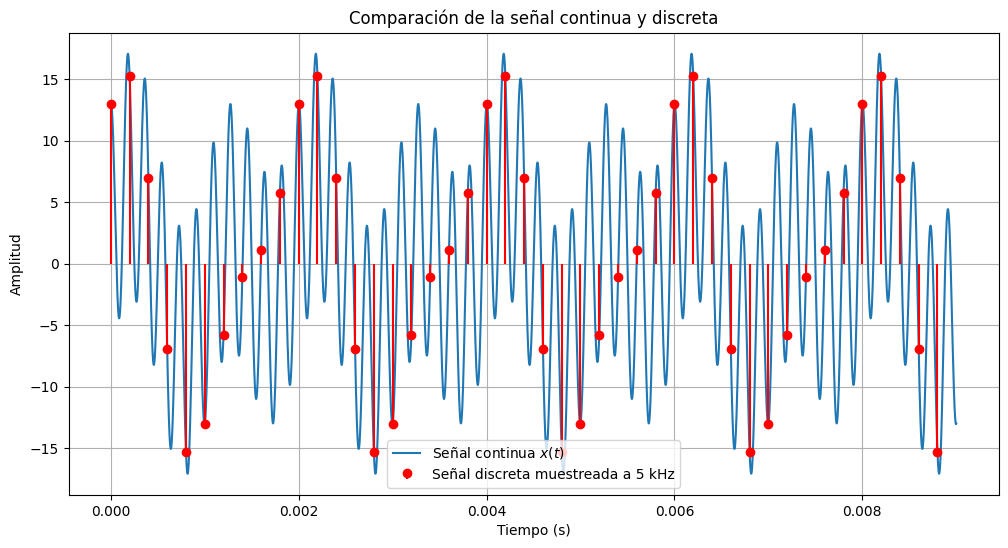

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la señal continua

def x(t):
    return 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Definimos los parámetros de muestreo
Fs = 5000  # Frecuencia de muestreo en Hz
Ts = 1/Fs   # Periodo de muestreo en segundos
t_max = 0.009  # Duración de la señal en segundos para visualización (2 ms)
t = np.arange(0, t_max, Ts)  # Vector de tiempo para la señal discreta

# Se generan señal continua y discreta
tc = np.linspace(0, t_max, 5000)  # Se seuaviza la curva
xc = x(tc)
xd = x(t)


# Graficamos señal continua
plt.figure(figsize=(12, 6))
plt.plot(tc, xc, label='Señal continua $x(t)$')

# Graficar señal discreta
plt.stem(t, xd, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='Señal discreta muestreada a 5 kHz', use_line_collection=True)

plt.title('Comparación de la señal continua y discreta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


c) Implemente una simulacion para encontrar la salida del sis- ´
tema lineal e invariante al tiempo $H(\cdot), \text{ con respuesta al escalón } h_\epsilon[n] = \{2, 4, 1, 5, 0, 10\}, \quad n \in \mathbb{Z}, \text{ ante la entrada analógica en corriente } x(t) = 20(\cos(\frac{t}{3}) + \cos(\frac{t}{4})) \, [\text{A}].$
A: Amperios. Incluya los acondicionamientos necesarios de
discretizacion y cuantizaci ´ on, asumiendo un microprocesa- ´
dor de 4 bits con entrada analoga de 4mA a 20mA.

<ipython-input-24-78dea10e7669>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


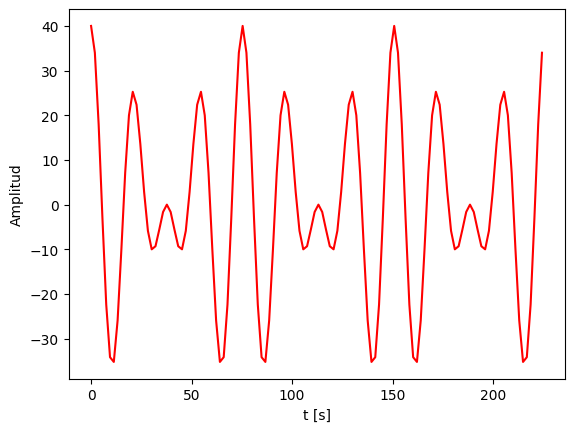

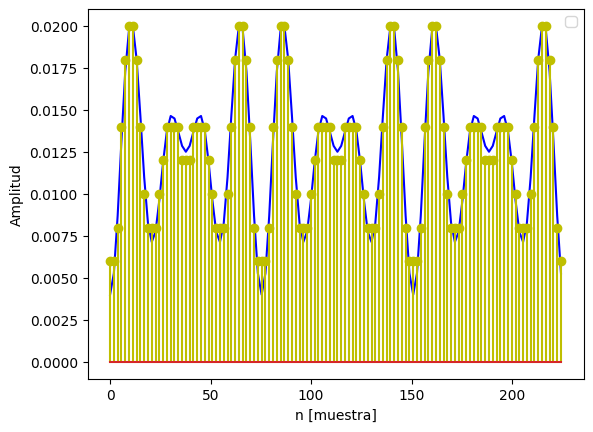

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#función cero y pendiente
def my_ceropend(x,xhmax=0.004,xhmin=0.02):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #periodo cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 0.004
xhmin = 0.02
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

#cuantizamos
nbits = 3 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráfica de señal continua
plt.plot(t,x,'r',label='')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()

#gráfica de señal discreta
plt.plot(t,xh,'b',label='')
plt.stem(t,xq,'y',label='')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Una vez discretizada y cuantizada la señal, pasamos a encontrar la salida del SLIT aplicando convolucion entre la señal digital y la respuesta impulso

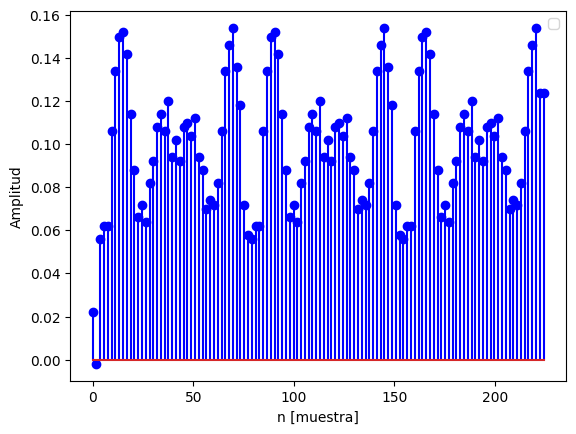

In [27]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit

y = np.convolve(xq,h,mode='same')#respuesta del slit

#grafica de la señal de salida
plt.stem(t,y,'b',label='')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()